In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [2]:
# 제출 점수(제출 날짜) : 0.6781512232(2021-12-30 15:11:34)

# 설정

In [3]:
# pycaret : cat
# probability_threshold : 0.2374
# tune : ❌(자체 점수 떨어짐.)
# bin
# 순서형 특성 수치형으로 지정(4개)
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'
# 사용특성 : 매칭 특성 + 회원/컨텐츠 둘다에 있는 특성(16개 특성 제거)

In [4]:
# 매칭 속성

In [5]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 불러오기

In [18]:
train = pd.read_csv('../data/df_train.csv')
test = pd.read_csv('../data/df_test.csv')
# train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
# test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [20]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [22]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

In [23]:
# test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
#  'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
#  'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
#  'person_prefer_e',
#  'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
#  'contents_attribute_i', 'contents_attribute_a',
#  'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
#  'contents_attribute_l', 'contents_attribute_d',
#  'contents_attribute_m', 'contents_attribute_e',
#  'contents_attribute_h',
#  'person_rn']
# target = ['target']
# train_col = test_col + target
# len(train_col), len(test_col)

In [24]:
# train = train[train_col]
# test = test[test_col]

## 훈련에 의미가 적은 열 제거

In [25]:
# 제거된 특성(16개)
# 'id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn',
# 'person_attribute_b', 'contents_attribute_i', 'contents_attribute_j_1', 'contents_attribute_j',
# 'contents_attribute_k', 'contents_attribute_l', 'contents_attribute_m',
# 'contents_attribute_l_n', 'contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l'

In [26]:
# 삭제할 특성
pop_col = ['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn', 'person_attribute_b', 'contents_attribute_i', 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_k', 'contents_attribute_l', 'contents_attribute_m', 'contents_attribute_l_n', 'contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l']
len(pop_col)

16

In [27]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_prefer_c         501951 non-null  int64
 9   person_prefer_d_1       501951 non-null  int64
 10  person_prefer_d_2       501951 non-null  int64
 11  person_prefer_d_3       501951 non-null  int64
 12  person_prefer_e         501951 non-null  int64
 13  person_prefer_h_1       501951 non-null  int64
 14  person_prefer_h_2       501951 non-null  int64
 15  

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_prefer_c         46404 non-null  int64
 9   person_prefer_d_1       46404 non-null  int64
 10  person_prefer_d_2       46404 non-null  int64
 11  person_prefer_d_3       46404 non-null  int64
 12  person_prefer_e         46404 non-null  int64
 13  person_prefer_h_1       46404 non-null  int64
 14  person_prefer_h_2       46404 non-null  int64
 15  person_prefer_h_3  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [30]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_a,contents_attribute_c,contents_attribute_d,contents_attribute_e,contents_attribute_h,person_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l
0,True,True,True,False,False,False,1,4,5,275,370,369,8,4,95,59,3,1,275,4,139,618822,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94
1,False,False,False,True,True,False,1,3,1,114,181,175,4,131,101,96,3,1,275,4,133,571659,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94
2,False,False,False,True,False,False,2,0,5,464,175,452,3,54,263,56,1,1,94,4,53,399816,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48
3,False,False,False,True,False,False,2,0,5,703,705,704,3,72,227,2,3,1,275,3,74,827967,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71
4,True,True,True,False,False,False,1,3,5,275,370,369,4,214,210,209,1,1,275,4,74,831614,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71


In [31]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_a,contents_attribute_c,contents_attribute_d,contents_attribute_e,contents_attribute_h,person_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l
0,True,False,False,True,True,True,1,1,1,857,851,1227,4,263,56,49,3,1,839,5,263,393790,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250
1,False,False,False,True,False,False,2,0,2,683,1086,662,2,258,263,49,3,1,278,4,263,394058,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250
2,True,False,False,True,True,True,2,3,1,514,790,1233,0,177,170,171,3,1,490,4,177,1002061,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169
3,True,False,False,True,True,True,1,2,5,114,181,175,4,177,170,171,3,1,150,3,177,1000813,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169
4,True,False,False,True,False,False,1,6,5,1082,1078,1056,5,178,177,4,1,1,1097,4,177,111146,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169


## 카데고리형 특성으로 지정할 특성

In [32]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [33]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_prefer_e', 'contents_attribute_e'

In [34]:
cat_cols = ['person_attribute_a_a', 'person_prefer_e', 'contents_attribute_e']

## bin_numeric_features

In [35]:
# bin_numeric_features : ❌
  # 미리 정의된 bin을 사용하여 연속된 값을 범주형 값으로 변환하는 방법
  # 연속된 값의 고유값이 너무 많거나 예상 범위를 벗어난 극단값이 거의 없는 경우에 효과적

In [36]:
# 고유값 개수가 100개 이상인 특성
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_h : 250
# person_prefer_d_1_n : 433
# person_prefer_d_1_s : 137
# person_prefer_d_2_n : 435
# person_prefer_d_2_s : 137
# person_prefer_d_3_n : 420
# person_prefer_d_3_s : 136
# contents_attribute_d_n : 431
# contents_attribute_d_s : 137
# person_prefer_h_1_m : 246
# person_prefer_h_2_m : 246
# person_prefer_h_3_m : 246
# contents_attribute_h_m : 228
# contents_attribute_l_n : 736
# contents_attribute_l_s : 305

In [37]:
# bin_numeric_features 적용할 특성
# 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
# 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
# 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'
# 'person_prefer_d_1_n', 'person_prefer_d_1_s', 
# 'person_prefer_d_2_n', 'person_prefer_d_2_s',
# 'person_prefer_d_3_n', 'person_prefer_d_3_s',
# 'contents_attribute_d_n', 'contents_attribute_d_s',
# 'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
# 'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s'

In [38]:
bin_cols = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
            'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
            'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h',
            'person_prefer_d_1_n', 'person_prefer_d_1_s', 
            'person_prefer_d_2_n', 'person_prefer_d_2_s',
            'person_prefer_d_3_n', 'person_prefer_d_3_s',
            'contents_attribute_d_n', 'contents_attribute_d_s', 
            'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
            'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s']

# 모델 훈련/예측

In [39]:
ex = setup(train, target='target', n_jobs=-1,
           session_id=0, verbose=False, silent=True, 
           fold=5, fold_shuffle=True,
           numeric_features = cat_cols
           )

## 모델 비교

In [40]:
compare_models(sort='F1')
# 47m 48s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6095,0.6531,0.6455,0.6018,0.6229,0.2190,0.2196,59.3360
lightgbm,Light Gradient Boosting Machine,0.6023,0.6443,0.6436,0.5942,0.6179,0.2047,0.2054,5.1880
gbc,Gradient Boosting Classifier,0.5931,0.6319,0.6151,0.5888,0.6017,0.1862,0.1864,133.4240
lda,Linear Discriminant Analysis,0.5854,0.6191,0.6153,0.5802,0.5973,0.1707,0.1711,13.2200
ridge,Ridge Classifier,0.5853,0.0000,0.6153,0.5802,0.5972,0.1707,0.1710,1.0880
ada,Ada Boost Classifier,0.5866,0.6204,0.6094,0.5825,0.5957,0.1733,0.1735,27.7500
rf,Random Forest Classifier,0.5962,0.6312,0.5883,0.5974,0.5929,0.1925,0.1925,76.9800
et,Extra Trees Classifier,0.5820,0.6100,0.5714,0.5834,0.5773,0.1639,0.1640,119.2960
nb,Naive Bayes,0.5262,0.5366,0.5868,0.5231,0.5531,0.0525,0.0529,1.1260
dt,Decision Tree Classifier,0.5481,0.5486,0.5469,0.5479,0.5474,0.0963,0.0963,9.7500


In [41]:
# 모델 생성
model = create_model('catboost')
# 1m 37s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6083,0.6523,0.6420,0.6011,0.6209,0.2166,0.2171
1,0.6090,0.6528,0.6480,0.6008,0.6235,0.2181,0.2187
2,0.6110,0.6559,0.6455,0.6035,0.6238,0.2220,0.2225
3,0.6100,0.6517,0.6464,0.6022,0.6235,0.2200,0.2206
4,0.6093,0.6526,0.6455,0.6016,0.6227,0.2185,0.2191
Mean,0.6095,0.6531,0.6455,0.6018,0.6229,0.2190,0.2196
SD,0.0009,0.0015,0.0019,0.0009,0.0011,0.0018,0.0018


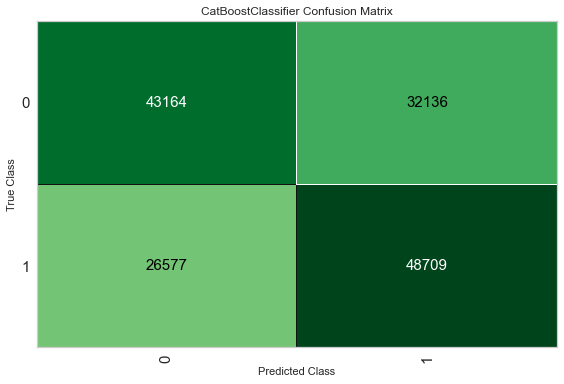

In [42]:
plot_model(model, plot='confusion_matrix')

In [43]:
# optimize threshold for trained model
optimize_threshold(model, false_negative=-1500, false_positive=-500)

0.2374

Optimized Probability Threshold: 0.2374 | Optimized Cost Function: -36658500


## train 예측, F1 자체평가

In [44]:
from pycaret.utils import check_metric

In [45]:
th = 0.2374
train_pred = predict_model(model, train, probability_threshold=th)
check_metric(train['target'], train_pred['Label'], metric = 'F1')
# fn, fp = -1500, -500 
# threshold, f1 score =  0.2374, 0.678
# 2m 15s

0.678

## test 예측

In [46]:
# 예측
pred = predict_model(model, test, probability_threshold=th)

In [48]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.6101
1,1,0.3065
2,1,0.5440
3,1,0.5683
4,1,0.3261


In [49]:
pred['Label']

0        1
1        1
2        1
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int32

In [50]:
pred['Label'].value_counts()

1    44299
0     2105
Name: Label, dtype: int64

# 제출파일 불러오기

In [51]:
sub = pd.read_csv('../data/sample_submission.csv')
# sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [52]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [53]:
sub['target'] = pred['Label']
sub.to_csv('sub_ver3.2.csv', index=False)
# sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver3.2.csv', index=False)

In [54]:
sub.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


# 코드 마지막